# Heart disease Prediction: A Logistic Regression Analysis
##### The goal is to understand the factors that influence hear disease and to build a model that can predict a person's probability of heart disease
##### Heart disease Datasets on UCI: https://archive.ics.uci.edu/dataset/45/heart+disease
##### or on Kaggle: https://www.kaggle.com/code/desalegngeb/heart-disease-predictions/input

### 1. Exploratory data analysis 

In [36]:
# installing seaborn library on Jupyterlite
%pip install seaborn

In [37]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# import packages from sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import Ridge 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import sklearn.metrics as metrics

In [38]:
# data loading process
data = pd.read_csv("Heart_disease_data.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0
6,62,0,3,140,268,0,2,160,0,3.6,2,2,1,1
7,57,0,3,120,354,0,0,163,1,0.6,0,0,1,0
8,63,1,3,130,254,0,2,147,0,1.4,1,1,3,1
9,53,1,3,140,203,1,2,155,1,3.1,2,0,3,1


#### Arribute columns explained:

- cp (cat.): Describes the type of chest pain the patient experiences. Even if the numbering in your notebook's description (1-4) differs slightly from the data (0-3), the concepts are the same:

    - 0: Typical Angina: This is the classic, expected type of chest pain associated with heart disease, often triggered by exertion.

    - 1: Atypical Angina: Chest pain that is less typical but still could be heart-related.

    - 2: Non-anginal Pain: Chest pain that is likely not related to the heart.

    - 3: Asymptomatic: The patient does not experience chest pain.

- trestbps (num.): resting blood pressure (in mm Hg on admission to the hospital)

- chol (num): serum cholestoral in mg/dl

- fbs (cat.): This indicates if the patient's blood sugar was high after not eating for a period.

   - 1: sugar was over 120 mg/dl, which can be a sign of diabetes, a risk factor for heart disease.
  
   - 0: means it was not.
 
-  restecg (cat.): resting electrocardiographic results

    - 0: normal

    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV, A minor, non-specific irregularity was found in the heartbeat pattern.)
      
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria, This suggests that the heart's main pumping chamber (the left ventricle) is thicker or larger than normal, often due to high blood pressure.
    
- thalach (num.): maximum heart rate achieved

- exang (cat.): exercise induced angina 

   - 0 = no
     
   - 1 = yes

- oldpeak (num.) = ST depression induced by exercise relative to rest (This is a measurement from the EKG that shows how much the heart's electrical activity changes during exercise compared to rest. A larger number indicates a more significant change, which can be a sign of poor blood flow.)

- slope (cat.): the slope of the peak exercise ST segment (This describes the shape of the EKG waveform during recovery after exercise. A flat or downward-sloping shape is generally more concerning than an upward-sloping one)
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping

-  ca (cat.): The number of major blood vessels (from 0 to 3) that appear blocked or narrowed based on fluoroscopy (a type of X-ray imaging). A higher number is worse.

-  thal (cat.):

    - 0: error (in the original dataset 0 maps to NaN's)

    - 1: Normal: Blood flow is normal.

    - 2: Fixed defect: A part of the heart muscle has no blood flow, likely due to a previous heart attack.

    - 3: Reversible defect: A part of the heart muscle has poor blood flow during exercise, but it "reverses" and improves at rest. This is a key sign of a blockage.)
 
-  result: target (cat.):

    - 0: The patient has less than 50% narrowing in their major blood vessels. They are considered not to have significant heart disease.

    - 1: The patient has more than 50% narrowing in at least one major blood vessel. They are considered to have significant heart disease.

In [39]:
# checking for NaN values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [40]:
# checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### 1.1 Checking for outliers 

In [41]:
# examine descriptive statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


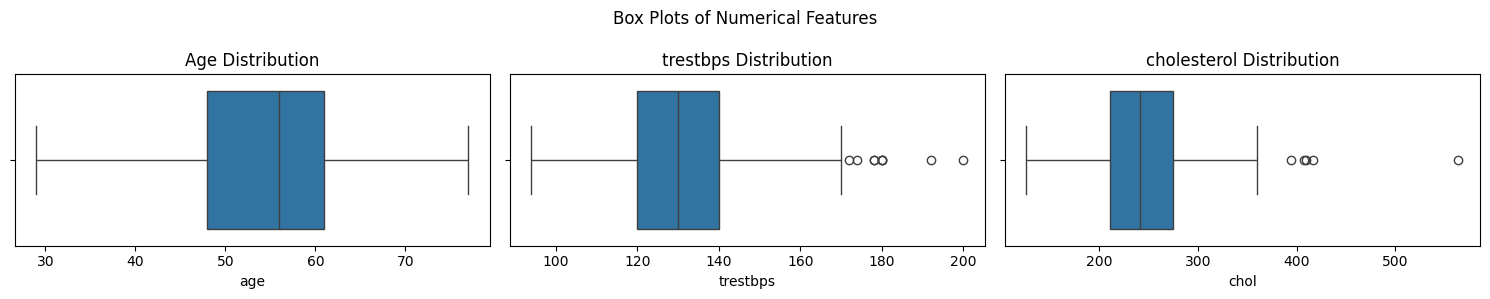

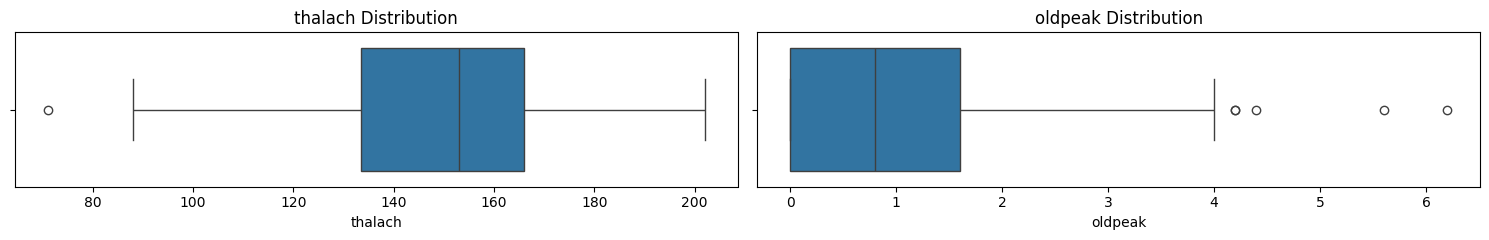

In [42]:
# checking outliers for numeric variables: age, trestbps, chol, thalach, oldpeak	
# Create box plots for numerical columns to visually inspect for outliers

fig, axes = plt.subplots(1, 3, figsize=(15, 3))
fig.suptitle('Box Plots of Numerical Features')

sns.boxplot(ax=axes[0], x=data['age'])
axes[0].set_title('Age Distribution')

sns.boxplot(ax=axes[1], x=data['trestbps'])
axes[1].set_title('trestbps Distribution')

sns.boxplot(ax=axes[2], x=data['chol'])
axes[2].set_title('cholesterol Distribution')

plt.tight_layout()
plt.show()

# --------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(15, 2.5))

sns.boxplot(ax=axes[0], x=data['thalach'])
axes[0].set_title('thalach Distribution')

sns.boxplot(ax=axes[1], x=data['oldpeak'])
axes[1].set_title('oldpeak Distribution')

plt.tight_layout()
plt.show()

### 1.2 Define outliers of numeric variables 

In [43]:
# quanitfyig outliers using IQR method for numeric columns

def find_outlier_iqr(df, column, iqr_factor):

    """ 
        Find outliers using IQR method
        df (pandas.Dataframe): dataframe of interest
        column (string): the name of column of interest in df
        iqr_factor (float): The multiplier for the IQR to define outlier bounds, standard is 1.5

        returns a dataframe with outlier rows      
    """
    # define iqr
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1     

    # define upper_limit
    upper_limit = q3 + (iqr * iqr_factor)
    lower_limit = q1 - (iqr * iqr_factor)

    # define outliers
    outliers = df[(df[column] > upper_limit) | (df[column] < lower_limit)]
    
    # return a dataframe with outlier rows
    return outliers

### 1.3 Examine outliers of numeric variables 

In [44]:
# finding outliers for each numeric variables: age
find_outlier_iqr(data, "age", 1.5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [45]:
# finding outliers for each numeric variables: trestbps
find_outlier_iqr(data, "trestbps", 1.5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,2,172,199,1,0,162,0,0.5,0,0,3,0
83,68,1,2,180,274,1,2,150,1,1.6,1,0,3,1
126,56,0,3,200,288,1,2,133,1,4.0,2,2,3,1
172,59,0,3,174,249,0,0,143,1,0.0,1,0,1,1
183,59,1,0,178,270,0,2,145,0,4.2,2,0,3,0
188,54,1,1,192,283,0,2,195,0,0.0,0,1,3,1
201,64,0,3,180,325,0,0,154,1,0.0,0,0,1,0
213,66,0,3,178,228,1,0,165,1,1.0,1,2,3,1
231,55,0,3,180,327,0,1,117,1,3.4,1,0,1,1


In [46]:
# finding outliers for each numeric variables: chol
find_outlier_iqr(data, "chol", 1.5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,65,0,2,140,417,1,2,157,0,0.8,0,1,1,0
121,63,0,3,150,407,0,2,154,0,4.0,1,3,3,1
152,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
173,62,0,3,140,394,0,2,157,0,1.2,1,0,1,0
181,56,0,3,134,409,0,2,150,1,1.9,1,2,3,1


In [47]:
# finding outliers for each numeric variables: thalach
find_outlier_iqr(data, "thalach", 1.5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
245,67,1,3,120,237,0,0,71,0,1.0,1,0,1,1


In [48]:
# finding outliers for each numeric variables: oldpeak
find_outlier_iqr(data, "oldpeak", 1.5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
91,62,0,3,160,164,0,2,145,0,6.2,2,3,3,1
123,55,1,3,140,217,0,0,111,1,5.6,2,0,3,1
183,59,1,0,178,270,0,2,145,0,4.2,2,0,3,0
191,51,1,3,140,298,0,0,122,1,4.2,1,3,3,1
285,58,1,3,114,318,0,1,140,0,4.4,2,3,2,1


Note:

For a clinical dataset like this, the outliers identified are likely not data entry errors but represent real, albeit extreme, clinical measurements. These values can be very important for creating a model. Removing these data points would mean losing valuable information about individuals with severe symptoms. 

### 1.4 Examine relationship between each variables

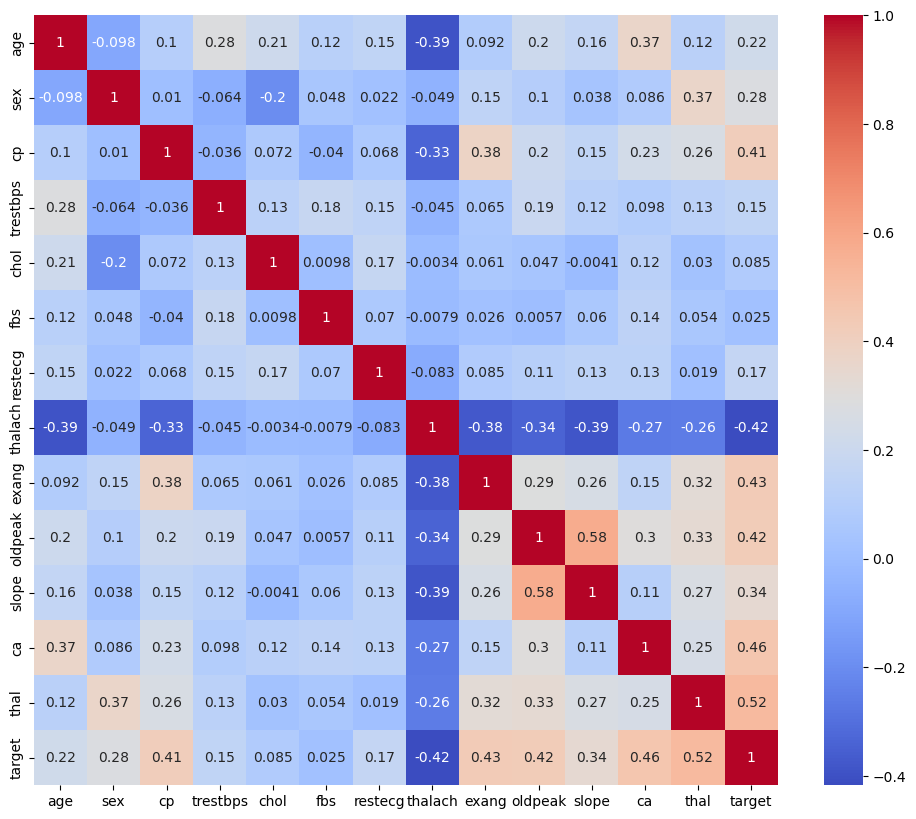

In [49]:
# examine relationship betweeneach factor using a heatmaop
correlation_matrix = data.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

This heatmap is a useful first-pass analysis, but it's important to interpret the correlations with care due to the nature of the categorical data.

Ordinal Variables: The correlation is most meaningful for ordinal variables like ca (number of diseased vessels) and slope (ST slope progression), where the increasing numbers correspond to a change in the condition's severity.

Nominal Variables: For nominal variables like cp (chest pain type) and thal (defect type), the numbers serve only as labels. A Pearson correlation is less reliable here because it treats these labels as having a mathematical order, which they do not.

Therefore, while the heatmap offers valuable clues, the relationships involving nominal variables are better analyzed using tools like countplots or crosstabulations.

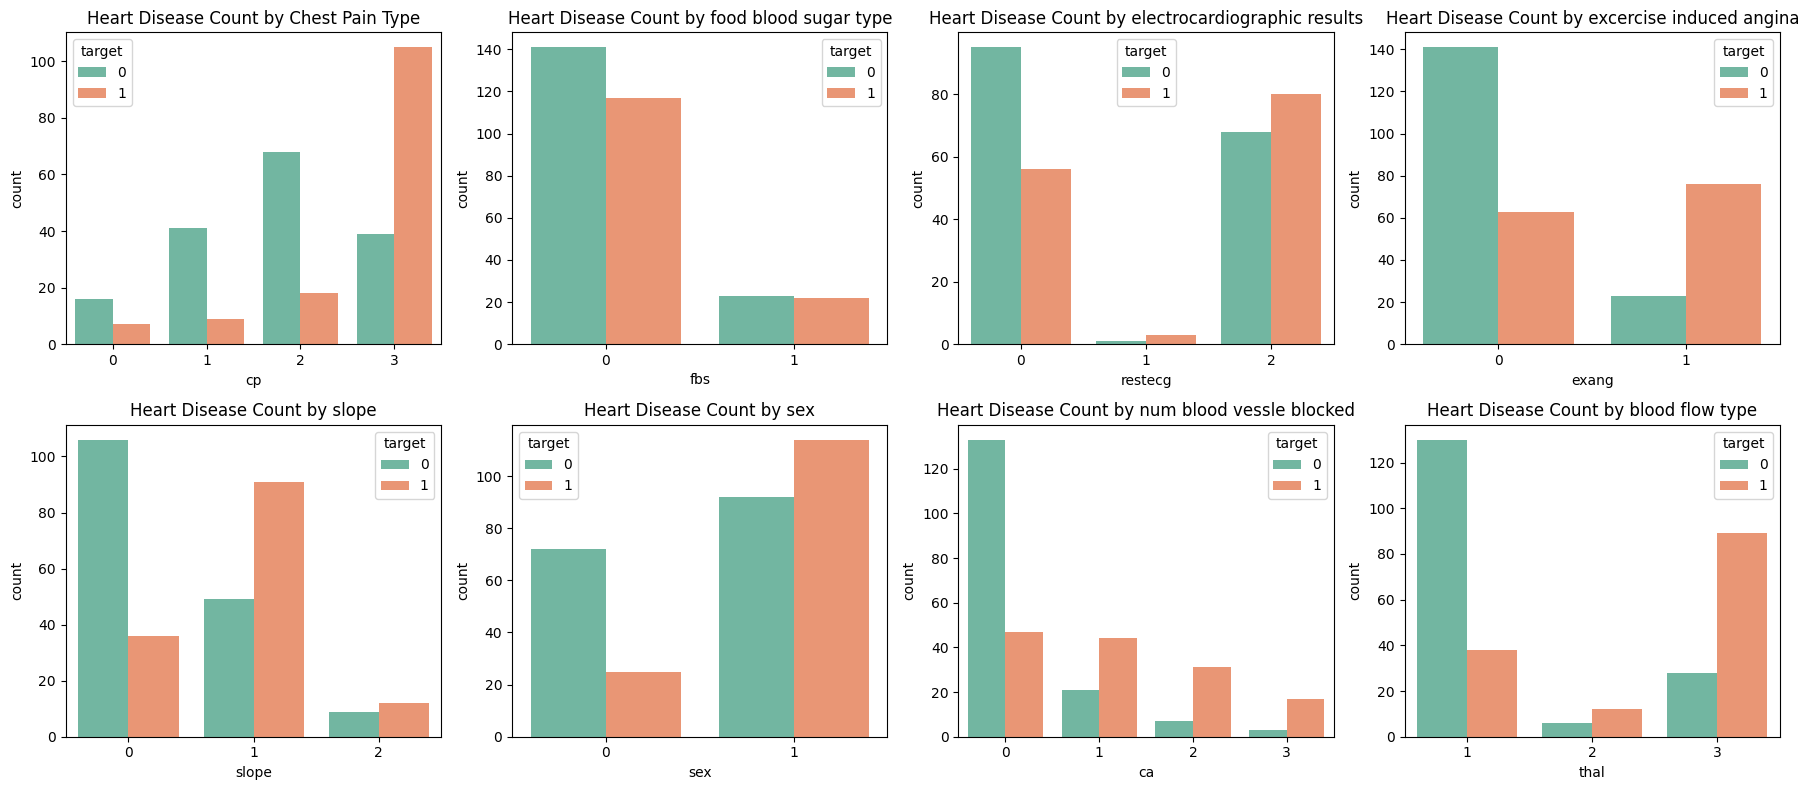

In [50]:
# use count plot for categorial variables
fig, axes = plt.subplots(2, 4, figsize = (18, 8))
custom_palette = "Set2"

sns.countplot(x='cp', hue='target', data=data, palette = custom_palette, ax = axes[0,0])
axes[0,0].set_title('Heart Disease Count by Chest Pain Type')

sns.countplot(x='fbs', hue='target', data=data, palette = custom_palette, ax = axes[0,1])
axes[0,1].set_title('Heart Disease Count by food blood sugar type')

sns.countplot(x='restecg', hue='target', data=data, palette = custom_palette, ax = axes[0,2])
axes[0,2].set_title('Heart Disease Count by electrocardiographic results')

sns.countplot(x='exang', hue='target', data=data, palette = custom_palette, ax = axes[0,3])
axes[0,3].set_title('Heart Disease Count by excercise induced angina')

sns.countplot(x='slope', hue='target', data=data, palette = custom_palette, ax = axes[1,0])
axes[1,0].set_title('Heart Disease Count by slope')

sns.countplot(x='sex', hue='target', data=data, palette = custom_palette, ax = axes[1,1])
axes[1,1].set_title('Heart Disease Count by sex')

sns.countplot(x='ca', hue='target', data=data, palette = custom_palette, ax = axes[1,2])
axes[1,2].set_title('Heart Disease Count by num blood vessle blocked')

sns.countplot(x='thal', hue='target', data=data, palette = custom_palette, ax = axes[1,3])
axes[1,3].set_title('Heart Disease Count by blood flow type')

plt.tight_layout()
plt.show()

These visualizations reveal several key relationships between the categorical factors and the presence of heart disease (target=1):

1. Chest Pain Type (cp): Patients with Atypical Angina (1) and Non-anginal Pain (2) have a much higher proportion of heart disease. Interestingly, patients with Typical Angina (0) are more likely to not have heart disease, suggesting that this type of pain in this dataset is less indicative of a blockage.

2. Fasting Blood Sugar (fbs): This variable does not show a strong visual correlation. The proportion of individuals with and without heart disease is similar regardless of whether their fasting blood sugar is high (fbs=1) or not.

3. Exercise-Induced Angina (exang): This is a strong predictor. The presence of exercise-induced angina (exang=1) is clearly associated with a higher incidence of heart disease.

4. ST Slope (slope): The slope of the ST segment during exercise is critical. A flat (1) or downsloping (2) slope is highly indicative of heart disease, while an upsloping (0) slope is more common in healthy individuals.

5. Sex: The data shows a clear difference in heart disease rates between sexes. Males (sex=1) have a higher incidence of heart disease compared to their non-diseased counterparts. Females (sex=0), on the other hand, have a much lower rate of heart disease in this dataset.

6. Number of Major Vessels Blocked (ca): This shows a powerful trend. The likelihood of having heart disease increases dramatically as the number of blocked vessels rises from 0 to 3. A value of 0 is strongly associated with the lower likelihood of disease.

7. Thal Blood Flow Type (thal): A Reversible Defect (3) and a Fixed Defect (2) are strong indicators of heart disease. In contrast, a Normal result (1) is primarily seen in patients without heart disease.

### 2. Predictive Modeling

In [51]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [52]:
# define feature X and target 
X = data.drop(columns = "target", axis = 1)
y = data['target']

In [53]:
data['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

Note:

Because the data will be randomly splitted into tranng data and test data, we use "stratify=y" to ensure that the training and test data has the same proportion of heart disease patients, we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model.

In [54]:
# prepare training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42) 

In [55]:
# confirm the data size
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [56]:
# define categorial and numeric features
categorial_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [57]:
# creating processor for different data types

# processor for numeric variables: (1) scaling 
numeric_transformer = Pipeline(steps = [('scalar', StandardScaler())])

# processor for categorial variables: (1) one-hot encoding
categorial_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

# Bundle preprocesser for all data types (combine two transformers above)
preprocesser = ColumnTransformer(transformers = [('num', numeric_transformer, numerical_features), ('cat', categorial_transformer, categorial_features)])

### 2.1 Predictive Modeling using Logistic Regression

In [58]:
# Create the full pipeline with Logistic Regression
logistic_pipeline = Pipeline(steps = [('preprocesser', preprocesser), ('regresser', LogisticRegression(random_state = 42))])

In [59]:
# train the pipeline
clf = logistic_pipeline.fit(X_train, y_train)
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('regresser', LogisticRegression(random_state=42))])

In [60]:
# Make predictions on the test set
prediction = logistic_pipeline.predict(X_test)

# Evaluate the model
mae_pipe = mean_absolute_error(y_test, prediction)
mse_pipe = mean_squared_error(y_test, prediction)
rmse_pipe = np.sqrt(mse_pipe)

print(f"Mean Absolute Error (MAE): {mae_pipe}")
print(f"Mean Squared Error (MSE): {mse_pipe}")
print(f"Root Mean Squared Error (RMSE): {rmse_pipe}")

Mean Absolute Error (MAE): 0.11475409836065574
Mean Squared Error (MSE): 0.11475409836065574
Root Mean Squared Error (RMSE): 0.3387537429470791


### 2.2 Evaluation of Predicted Model - Confusion Matrix

In [61]:
# print out the predicted label
clf.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [62]:
# print out the predicted probability
clf.predict_proba(X_test)[::,-1]

array([0.20929567, 0.60145782, 0.02148916, 0.03334708, 0.3118407 ,
       0.01557081, 0.11681799, 0.34861394, 0.72209751, 0.34742282,
       0.96562059, 0.02352735, 0.03427722, 0.92799701, 0.96827571,
       0.97890539, 0.76590796, 0.69300695, 0.70923836, 0.97914056,
       0.72760374, 0.04208378, 0.84520128, 0.23347798, 0.8115307 ,
       0.03938699, 0.0903792 , 0.84562802, 0.08436408, 0.970595  ,
       0.34885686, 0.94051621, 0.50786951, 0.53170869, 0.14601116,
       0.90067712, 0.19418282, 0.26673102, 0.03898709, 0.8588818 ,
       0.85699284, 0.98976197, 0.9817895 , 0.9468737 , 0.13415838,
       0.02757432, 0.93762067, 0.02694372, 0.98872108, 0.09762274,
       0.0236043 , 0.98872836, 0.48730039, 0.05659382, 0.43752918,
       0.96712624, 0.90997278, 0.69666797, 0.01324408, 0.03647952,
       0.96795524])

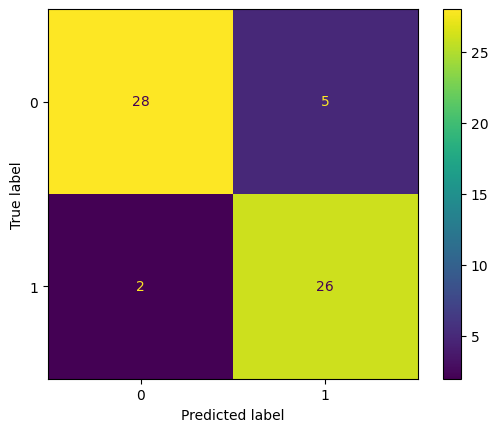

In [63]:
# create a confusion matrix

# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, prediction, labels = clf.classes_)

# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Display the confusion matrix
disp.plot()

From the Confusion Matrix: The model is performing well, but it's important to understand the types of errors from the model:

 - True Positives (TP): 28 - It correctly identified 28 patients who have heart disease.

 - True Negatives (TN): 26 - It correctly identified 26 patients who do not have heart disease.

 - False Positives (FP): 5 - It incorrectly flagged 5 healthy patients as having heart disease. This could lead to unnecessary stress and follow-up tests.

 - False Negatives (FN): 2 - This is the most critical error. The model missed 2 patients who actually have heart disease, which could lead to a delayed or missed diagnosis. The modek can be improved to lower FN rate

### 2.3 Evaluation of Predicted Model - ROC curve

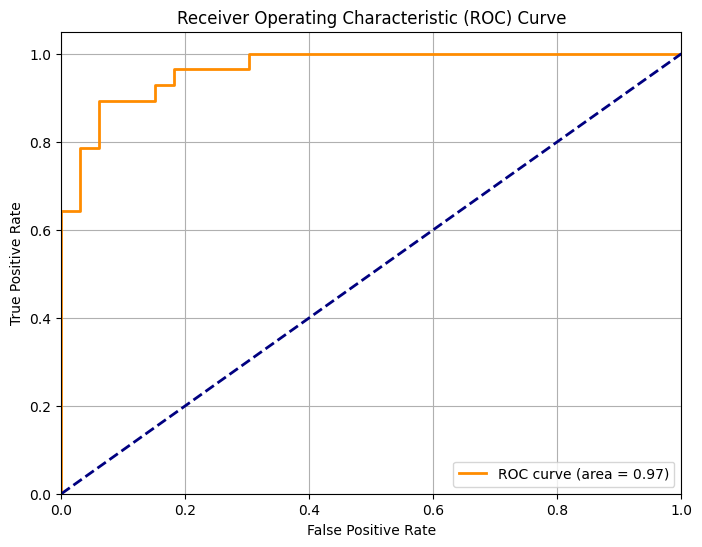

In [64]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_proba = logistic_pipeline.predict_proba(X_test)[:,1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The ROC (Receiver Operating Characteristic) curve shows how good the model is at distinguishing between the two classes (heart disease vs. no heart disease) at various probability thresholds

 - The curve shows the trade-off between the True Positive Rate (correctly identifying patients with the disease) and the False Positive Rate (incorrectly identifying patients without the disease).

 - The closer the curve is to the top-left corner, the better the model.

 - The AUC (Area Under the Curve) score gives you a single number to summarize this. A score of 1.0 is perfect, and 0.5 is no better than random guessing.

In [65]:
# Generate the classification report

from sklearn.metrics import classification_report

report = classification_report(y_test, prediction, target_names=['No Heart Disease', 'Has Heart Disease'])
print(report)

                   precision    recall  f1-score   support

 No Heart Disease       0.93      0.85      0.89        33
Has Heart Disease       0.84      0.93      0.88        28

         accuracy                           0.89        61
        macro avg       0.89      0.89      0.89        61
     weighted avg       0.89      0.89      0.89        61



- Recall = True Positives / (True Positives + False Negatives)
- Precision = True Positives / (True Positives + False Positives)
- F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

### 3. Project Conclusion

Key Performance Highlights
The model's true strength lies in its ability to correctly identify patients with heart disease, a critical requirement for any clinical diagnostic tool. The key metrics for the "Has Heart Disease" class are:

 - Recall (93%): This is an excellent result, indicating that the model successfully identified 93% of all patients who genuinely had heart disease in the test set. This high recall is crucial as it minimizes the risk of missed diagnoses.

 - Precision (84%): When the model predicts that a patient has heart disease, it is correct 84% of the time. This ensures that the model's high sensitivity does not lead to an excessive number of false alarms.

 - F1-Score (88%): This score confirms the model's exceptional balance between finding the true positive cases (recall) and maintaining the accuracy of its positive predictions (precision).

Final Summary:

In conclusion, through a systematic process of data exploration, preprocessing, and stratified modeling, a highly effective logistic regression classifier was developed. The final model is not only accurate but has been successfully optimized for its primary goal: correctly diagnosing the vast majority of patients with heart disease. This project serves as a strong proof-of-concept for how data science can be applied to create reliable and insightful tools for the medical field.